In [8]:
import ROOT
import pandas as pd
import numpy as np

In [20]:
tfile = ROOT.TFile("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-su-train/aug31/NH3-hwp-in/run-16771.root","READ")
t = tfile.Get("tree_postprocess")
df = ROOT.RDataFrame("tree_postprocess","/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-su-train/aug31/NH3-hwp-in/run-16771.root")

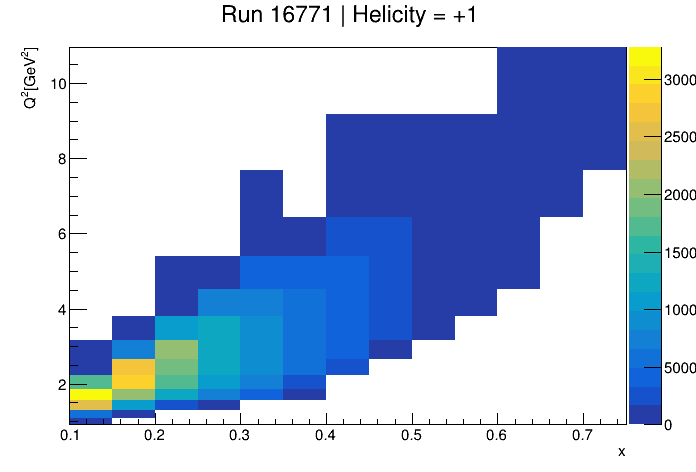

In [55]:
histo=df.Define("vz","abs(vz_e+4.5)").Filter("helicity=={} && p_e > 2.6 && th_e > 0.14 && th_e < 0.611 && vz < 4".format(1)).Histo2D(("a","Run 16771 | Helicity = +1;x;Q^{2}[GeV^{2}]",len(xbins)-1,xbins,len(Q2bins)-1,Q2bins),"x","Q2")
c=ROOT.TCanvas()
histo.Draw("colz")
c.Draw()

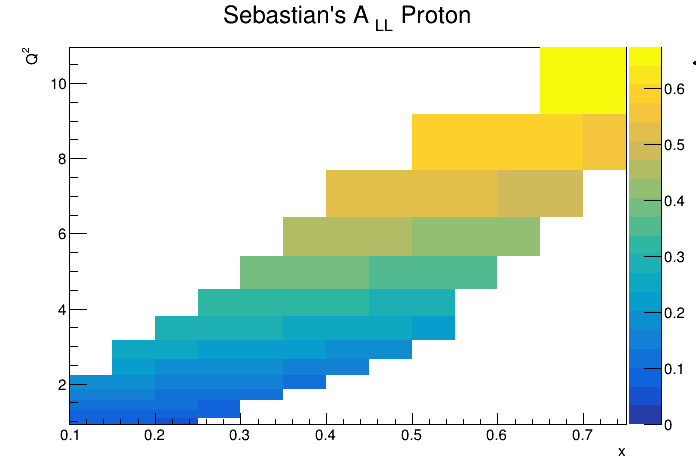

In [36]:
A_LL_proton_sebastian = pd.read_csv("./sebastian_A_LL_p.txt",sep=" ",names=["xmin","xmax","Q2min","Q2max","A_LL"])

xbins = np.unique(np.array(A_LL_proton_sebastian["xmin"].to_list()+A_LL_proton_sebastian["xmax"].to_list()))
Q2bins = np.unique(np.array(A_LL_proton_sebastian["Q2min"].to_list()+A_LL_proton_sebastian["Q2max"].to_list()))

h = ROOT.TH2F("h","Sebastian's A_{LL} Proton;x;Q^{2};A_{LL}",len(xbins)-1,xbins,len(Q2bins)-1,Q2bins)

for xl,xr in zip(xbins[:-1],xbins[1:]):
    for yl,yr in zip(Q2bins[:-1],Q2bins[1:]):
        A_LL = A_LL_proton_sebastian[(A_LL_proton_sebastian["xmin"]==xl) &
                                                        (A_LL_proton_sebastian["Q2min"]==yl)]["A_LL"].to_list()
        if(A_LL == []):
            continue
        else:
            h.Fill((xl+xr)/2,(yl+yr)/2,A_LL[0])
h.Draw("colz")
ROOT.gStyle.SetOptStat(0)
c.Draw()

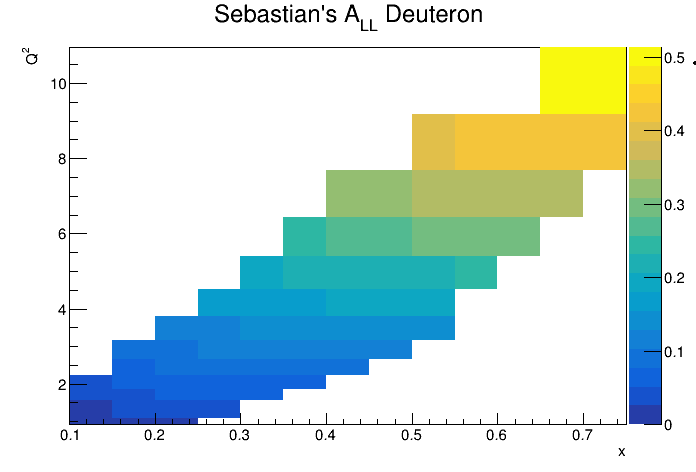

In [39]:
A_LL_deuteron_sebastian = pd.read_csv("./sebastian_A_LL_d.txt",sep=" ",names=["xmin","xmax","Q2min","Q2max","A_LL"])

xbins = np.unique(np.array(A_LL_deuteron_sebastian["xmin"].to_list()+A_LL_deuteron_sebastian["xmax"].to_list()))
Q2bins = np.unique(np.array(A_LL_deuteron_sebastian["Q2min"].to_list()+A_LL_deuteron_sebastian["Q2max"].to_list()))

h = ROOT.TH2F("h2","Sebastian's A_{LL} Deuteron;x;Q^{2};A_{LL}",len(xbins)-1,xbins,len(Q2bins)-1,Q2bins)

for xl,xr in zip(xbins[:-1],xbins[1:]):
    for yl,yr in zip(Q2bins[:-1],Q2bins[1:]):
        A_LL = A_LL_deuteron_sebastian[(A_LL_deuteron_sebastian["xmin"]==xl) &
                                                        (A_LL_deuteron_sebastian["Q2min"]==yl)]["A_LL"].to_list()
        if(A_LL == []):
            continue
        else:
            h.Fill((xl+xr)/2,(yl+yr)/2,A_LL[0])
h.Draw("colz")
ROOT.gStyle.SetOptStat(0)
c.Draw()

In [40]:
df1=pd.read_csv("/work/clas12/users/gmat/RGC_16700_16771_14xbins.csv")
df2=pd.read_csv("/work/clas12/users/gmat/RGC_16700_16771_sebastian.csv")

In [44]:
runs = df1["Run"].unique()
Pt1,Pterr1 = df1["Pt"].unique(),df1["Pt_err"].unique()
Pt2,Pterr2 = df2["Pt"].unique(),df2["Pt_err"].unique()

In [45]:
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-mp6e1ebk because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Text(0.5, 1.0, 'Target Polarization RG-C (Pb=83%)')

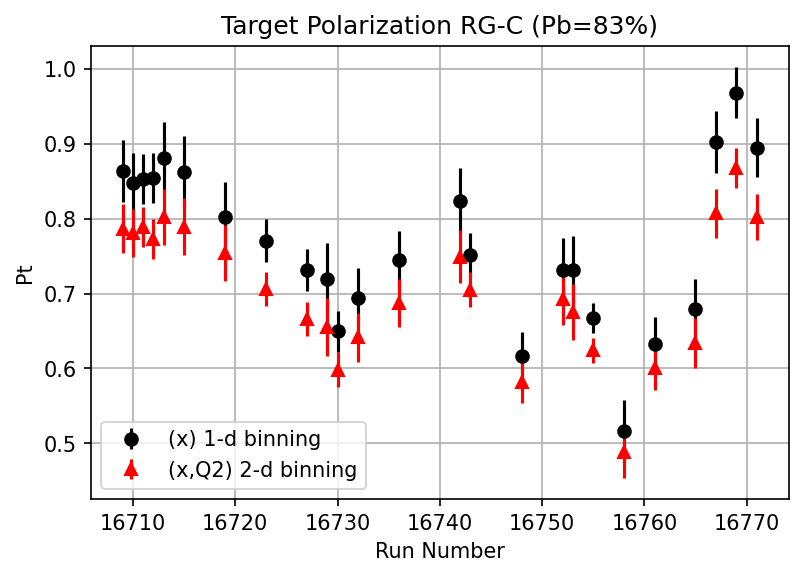

In [54]:
plt.figure(dpi=150)
plt.errorbar(runs,Pt1,yerr=Pterr1,label="(x) 1-d binning",fmt="ko")
plt.errorbar(runs,Pt2,yerr=Pterr2,label="(x,Q2) 2-d binning",fmt="r^")
plt.legend(loc='lower left')
plt.grid()
plt.xlabel("Run Number")
plt.ylabel("Pt")
plt.title("Target Polarization RG-C (Pb=83%)")